In [629]:
import numpy as np
import matplotlib.pyplot as plt

In [630]:
def fitness(X, Y):
    return X*np.cos(2*np.pi*Y) + Y*np.sin(2*np.pi*X)

In [631]:
def decoder(v):
    # let x = v[0:len(v)//2] and y = v[len(v)//2:]

    decx = v[0:len(v)//2]
    decy = v[len(v)//2:]

    # decx = []
    # decy = []
    # for i in range(len(v)):
    #     if i%2 == 0:
    #         decx.append(v[i])
    #     else:
    #         decy.append(v[i])
            
    x = np.dot(np.array([2**i for i in range(len(decx))]), decx)
    y = np.dot(np.array([2**i for i in range(len(decy))]), decy)

    # scale to [-2, 2]
    dx = 2**(len(decx) - 1)
    x = (x - dx) / (dx) * 2
    dy = 2**(len(decy) - 1)
    y = (y - dy) / (dy) * 2
    return x, y

v = np.random.randint(0, 2, 20)
print(v)
print(decoder(v))

[0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0]
(-1.03125, -1.23828125)


In [632]:
def selection(pop):
    pop_size = len(pop)
    fl = []
    for v in pop:
        x, y = decoder(v)
        f = fitness(x, y)
        fl.append(f)

    fl = np.array(fl)
    fl = fl / np.sum(fl)

    pl = [np.sum(fl[:i]) for i in range(len(fl))]

    for _ in range(pop_size):
        r = np.random.random()
        for i in range(len(pl)):
            if pl[i] > r:
                return pop[i]

pop = [np.random.randint(0, 2, 20) for _ in range(100)]
v = selection(pop)
print(v)
print(decoder(v))
print(fitness(*decoder(v)))

[1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1]
(0.62890625, 0.1328125)
0.3261585582422659


In [633]:
def crossover(v1, v2):
    num_genes = len(v1)
    r = np.random.randint(0, num_genes)
    vv1 = np.zeros(num_genes)
    vv2 = np.zeros(num_genes)

    vv1[:r] = v1[:r]
    vv1[r:] = v2[r:]

    vv2[:r] = v2[:r]
    vv2[r:] = v1[r:]

    return vv1, vv2

v1 = selection(pop)
v2 = selection(pop)
vv1, vv2 = crossover(v1, v2)
print(vv1)
print(vv2)

[1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.]
[1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]


In [634]:
def mutate(v, mutation_rate):
    num_genes = len(v)
    for i in range(num_genes):
        if np.random.random() < mutation_rate:
            v[i] = np.random.randint(0, 2)

    return v

v = selection(pop)
print(v)
vv = mutate(v, 0.05)
print(vv)

[1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1]
[1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1]


In [635]:
def init(pop_size=100, num_genes=20):
    pop = [np.random.randint(0, 2, num_genes) for _ in range(pop_size)]
    return pop

In [636]:
def GA(pop_size=100, num_genes=20, mutation_rate=0.05, cross_rate=0.7, max_iter=100):
    pop = init(pop_size, num_genes)

    fitl = []
    best_keep = []
    for _ in range(max_iter):
        ppop = []

        for _ in range(pop_size):
            opt = np.random.random() 
            if opt < cross_rate:
                v1 = selection(pop)
                v2 = selection(pop)
                vv1, vv2 = crossover(v1, v2)
                ppop.append(vv1)
                ppop.append(vv2)
            else:
                v = selection(pop)
                ppop.append(v)

        for v in ppop:
            v = mutate(v, mutation_rate)

        pop = ppop
        pop = sorted(pop, key=lambda v: fitness(*decoder(v)), reverse=True)

        vbest = pop[0]
        xbest, ybest = decoder(vbest)
        fbest = fitness(xbest, ybest)
        best_keep.append(vbest)
        fitl.append(fbest)
    
    pop = best_keep
    pop = sorted(pop, key=lambda v: fitness(*decoder(v)), reverse=True)
    return pop[0], fitl
        

In [637]:
# hyperparameters
pop_size = 100
num_genes = 20
mutation_rate = 0.05
cross_rate = 0.7

bv = None
bf = None
bcost = 0
for _ in range(10):
    v, fitl = GA(pop_size=pop_size, num_genes=num_genes, mutation_rate=mutation_rate, cross_rate=cross_rate, max_iter=50)
    cost = fitness(*decoder(v))

    if bv is None:
        bv = v
        bcost = cost
        bf = fitl
    if cost > bcost:
        bv = v
        bcost = cost
        bf = fitl



[1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(1.76171875, -2.0)
3.7563359221353894


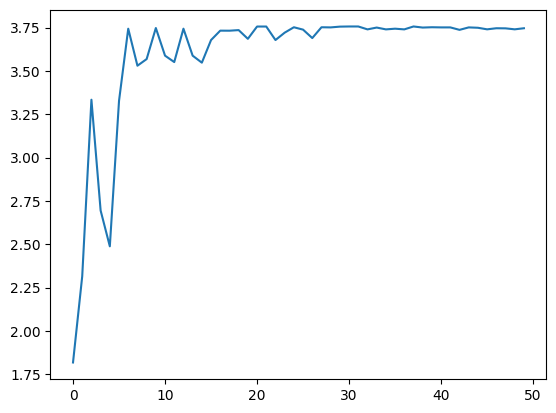

In [638]:
print(bv)
print(decoder(bv))

print(fitness(1.76267854, -2))

plt.plot(range(len(bf)), bf)
plt.show()

# Q1